# 03_MasterBDMl_modelo1_breastE2E_feature_engineering
Autor: Carlos Wong <br/>
Fecha: 2022_04_17 <br/>
Tipo de problema: `CLASIFICACIÓN` <br/>
Entradas: `dataset: breast_cancer_data` <br/>
Salidas: modelo predictivo  <br/>
Propósito: Descarga, entrenamiento, predicción y documentación con `SKLEARN` <br/>
1. `Librerías + Descarga de datos <-------- `
2. Exploración de la variable objetivo
3. EDA (Exploración de datos)
4. `Feature Engineering (Transformación de variables) <-------- `
5. Selección de variables
6. Modelos (pipeline, semilla en train_test split y modelos, comparación modelos)
7. Métricas de evaluación
8. Selección de algoritmo
9. Parametrización de algoritmo
10. Guardado del modelo

# 1. Librerías + Descarga de datos

In [84]:
# librerías estándar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')
#np.set_printoptions(precision=2)
pd.set_option('display.max_columns', 500)  # Muestra hasta 500 columnas del dataframe (evita los puntos '...'')

In [85]:
import warnings
warnings.filterwarnings("ignore")

In [86]:
# librerías sklearn
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer, Binarizer
from sklearn.pipeline import Pipeline, make_pipeline

In [87]:
# librerías de modelos
from sklearn.linear_model import LogisticRegression

In [88]:
data = pd.read_csv(r'.\datasets\breast_cancer_data.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [89]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [90]:
# Se eliminan columnas innecesarias
data = data.drop(['id','Unnamed: 32'], axis=1)

In [91]:
features = data.drop('diagnosis', axis=1)
target = data['diagnosis']

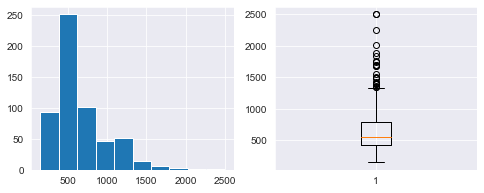

In [108]:
plt.figure(figsize = (8,3))
plt.subplot(1,2,1)
plt.hist(data['area_mean'])
plt.subplot(1,2,2)
plt.boxplot(data['area_mean'])
plt.show()

## 4. Feature Engineering

In [125]:
# En Sklearn los datos se insertan en formato numpy
X = features['area_mean']
X

0      1001.0
1      1326.0
2      1203.0
3       386.1
4      1297.0
        ...  
564    1479.0
565    1261.0
566     858.1
567    1265.0
568     181.0
Name: area_mean, Length: 569, dtype: float64

In [126]:
# shape indica las dimensiones
# cuando se muestra de ésta manera (569,) indica que es una serie de pandas
# Sklearn NO ENTIENDE BIEN las series de pandas
X.shape

(569,)

In [127]:
# éste formato de dataframe SÍ LO ENTIENDE bien Sklearn
X = features[['area_mean']]
X

,area_mean
0,1001.0
1,1326.0
2,1203.0
3,386.1
4,1297.0
...,...
564,1479.0
565,1261.0
566,858.1
567,1265.0


In [128]:
# esto SÍ lo entiende bien Sklearn
X.shape

(569, 1)

### 4.1. Rescale (MinMaxScaler)
- Se reescalan los datos en el intervalo [0,1], y se eliminan magnitudes
- Sklearn funciona con TRANSFORMADORES ('transform')

In [129]:
# Paso 1: Cargo en una variable el modelo seleccionado (por ejemplo: logistic regression con su parametrización)
X = features[['area_mean']]

In [130]:
# Paso 2: Cargo MinMaxScaler con su parametrización
scaler = MinMaxScaler()

In [131]:
# Paso 3: Ajustar (calcula el min, el max) y Transformar (aplica a la X, o sólo a las columnas seleccionadas)
# (Sklearn muestra los datos en formato numpy array)
X_transformed = scaler.fit_transform(X)
X_transformed

array([[0.36373277],
       [0.50159067],
       [0.44941676],
       [0.10290562],
       [0.4892895 ],
       [0.14150583],
       [0.38027572],
       [0.18426299],
       [0.15961824],
       [0.14099682],
       [0.27753977],
       [0.27041357],
       [0.4154825 ],
       [0.27113468],
       [0.18443266],
       [0.218579  ],
       [0.22948038],
       [0.27796394],
       [0.47359491],
       [0.17934252],
       [0.15970308],
       [0.05531283],
       [0.23792153],
       [0.53467656],
       [0.32284199],
       [0.32627784],
       [0.21264051],
       [0.40318134],
       [0.24979852],
       [0.34426299],
       [0.40063627],
       [0.12602333],
       [0.32059385],
       [0.43202545],
       [0.28152704],
       [0.30795334],
       [0.20763521],
       [0.16131495],
       [0.23554613],
       [0.17633086],
       [0.17794274],
       [0.09654295],
       [0.40742312],
       [0.17039236],
       [0.16458112],
       [0.39554613],
       [0.024772  ],
       [0.165

In [132]:
# Otra forma de conseguir lo mismo
X = features[['area_mean','texture_mean']]
X_transformed = MinMaxScaler().fit(X).transform(X)
X_transformed

array([[0.36373277, 0.0226581 ],
       [0.50159067, 0.27257355],
       [0.44941676, 0.3902604 ],
       ...,
       [0.30311771, 0.62123774],
       [0.4757158 , 0.66351031],
       [0.01590668, 0.50152181]])

In [133]:
X = features
X_transformed = MinMaxScaler().fit(X).transform(X)
X_transformed

array([[0.52103744, 0.0226581 , 0.54598853, ..., 0.91202749, 0.59846245,
        0.41886396],
       [0.64314449, 0.27257355, 0.61578329, ..., 0.63917526, 0.23358959,
        0.22287813],
       [0.60149557, 0.3902604 , 0.59574321, ..., 0.83505155, 0.40370589,
        0.21343303],
       ...,
       [0.45525108, 0.62123774, 0.44578813, ..., 0.48728522, 0.12872068,
        0.1519087 ],
       [0.64456434, 0.66351031, 0.66553797, ..., 0.91065292, 0.49714173,
        0.45231536],
       [0.03686876, 0.50152181, 0.02853984, ..., 0.        , 0.25744136,
        0.10068215]])

In [134]:
# En caso de querer leer la transformación sklearn (array numpy) se debe pasar a pandas DataFrame
pd.DataFrame(X_transformed, columns=data.columns[1:])

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,0.356147,0.120469,0.369034,0.273811,0.159296,0.351398,0.135682,0.300625,0.311645,0.183042,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,0.156437,0.082589,0.124440,0.125660,0.119387,0.081323,0.046970,0.253836,0.084539,0.091110,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,0.229622,0.094303,0.180370,0.162922,0.150831,0.283955,0.096768,0.389847,0.205690,0.127006,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,0.139091,0.175875,0.126655,0.038155,0.251453,0.543215,0.142955,0.353665,0.728148,0.287205,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,0.233822,0.093065,0.220563,0.163688,0.332359,0.167918,0.143636,0.357075,0.136179,0.145800,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.690000,0.428813,0.678668,0.566490,0.526948,0.296055,0.571462,0.690358,0.336364,0.132056,0.385479,0.197976,0.325873,0.283710,0.291906,0.200213,0.131263,0.464861,0.045843,0.115536,0.623266,0.383262,0.576174,0.452664,0.461137,0.178527,0.328035,0.761512,0.097575,0.105667
565,0.622320,0.626987,0.604036,0.474019,0.407782,0.257714,0.337395,0.486630,0.349495,0.113100,0.236828,0.464728,0.209490,0.172279,0.137879,0.165064,0.099747,0.317863,0.156160,0.055387,0.560655,0.699094,0.520892,0.379915,0.300007,0.159997,0.256789,0.559450,0.198502,0.074315
566,0.455251,0.621238,0.445788,0.303118,0.288165,0.254340,0.216753,0.263519,0.267677,0.137321,0.124896,0.157974,0.125713,0.077976,0.142435,0.263301,0.119444,0.294942,0.074548,0.103547,0.393099,0.589019,0.379949,0.230731,0.282177,0.273705,0.271805,0.487285,0.128721,0.151909
567,0.644564,0.663510,0.665538,0.475716,0.588336,0.790197,0.823336,0.755467,0.675253,0.425442,0.222524,0.272896,0.236300,0.148335,0.163477,0.445579,0.179722,0.315211,0.216103,0.182766,0.633582,0.730277,0.668310,0.402035,0.619626,0.815758,0.749760,0.910653,0.497142,0.452315


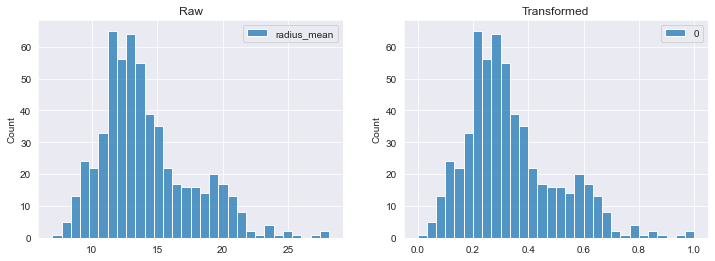

In [135]:
scaler = MinMaxScaler()

for feature in features:
    X = features[[feature]]
    X_transf = scaler.fit_transform (X)
    
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    sns.histplot(X, bins=30).set(title='Raw')
    plt.subplot(1,2,2)
    sns.histplot(X_transf, bins=30).set(title='Transformed')
    plt.show()
    break

### 4.2. Standarize (StandardScaler)
- Se centralizan los datos alrededor del cero
- Se eliminan magnitudes
- No mejora skewness/kurtosis
- Con datos no distribuídos de forma normal, no se gana mucho

In [136]:
X = features[['area_mean','texture_mean']]
scaler = StandardScaler().fit(X) 
rescaledX = scaler.transform(X)

In [137]:
features

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


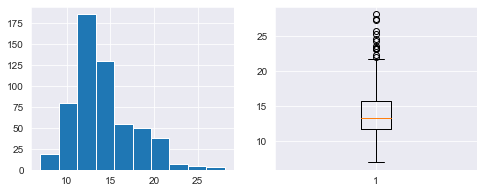

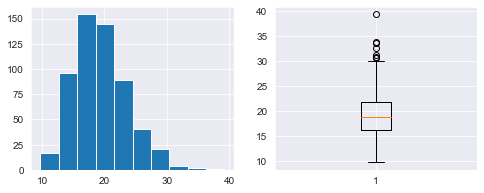

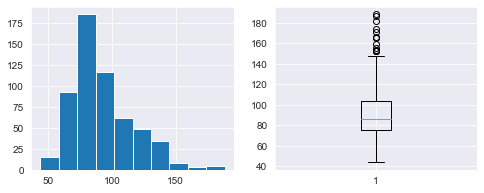

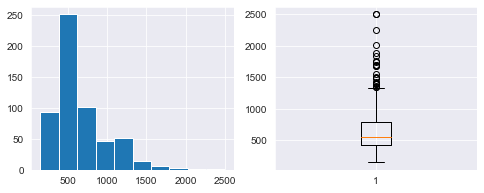

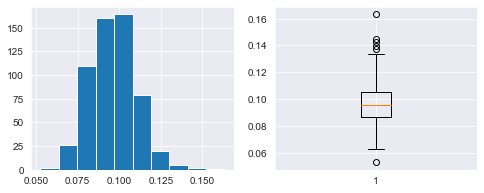

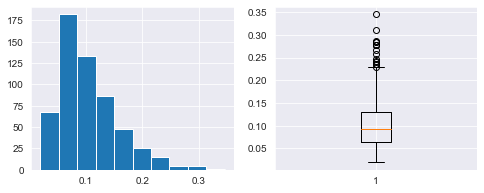

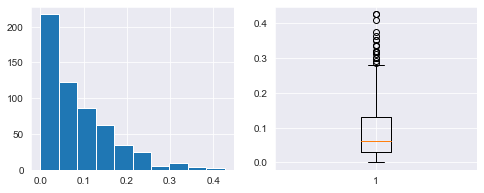

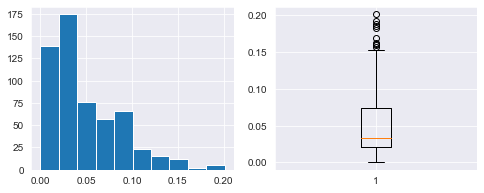

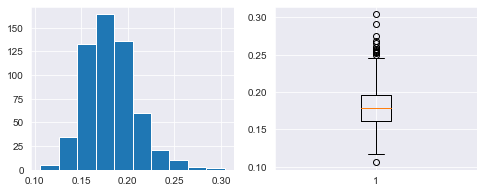

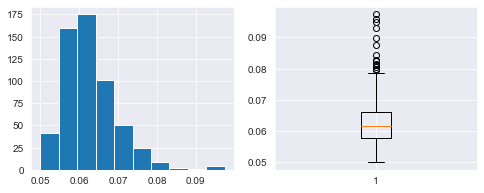

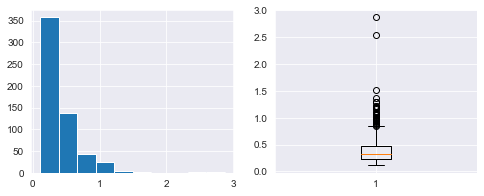

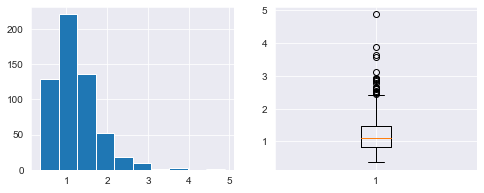

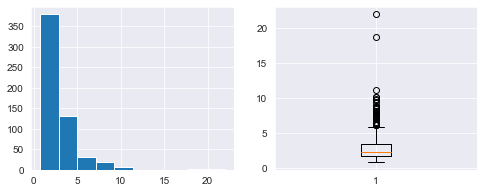

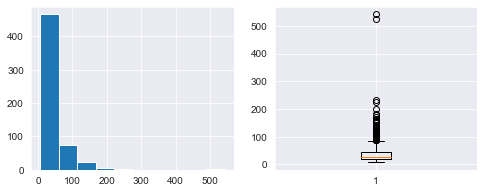

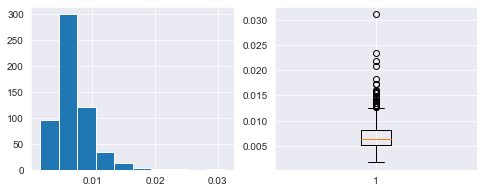

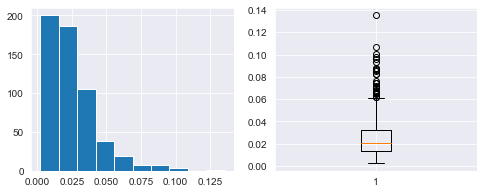

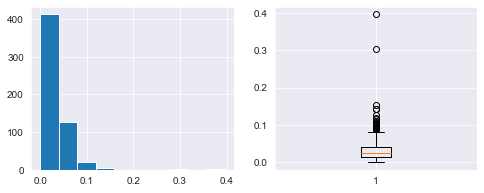

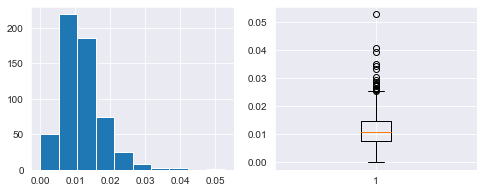

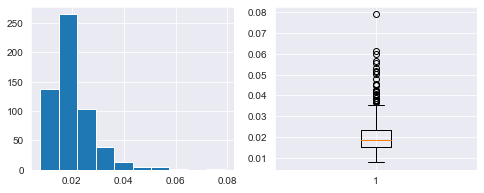

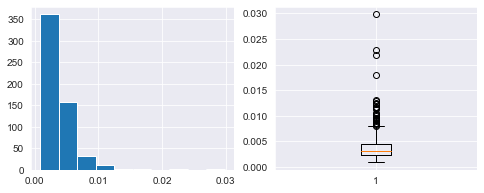

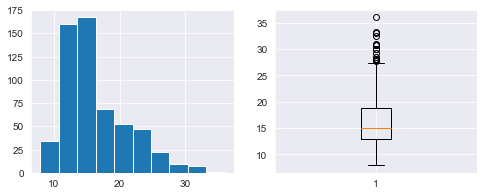

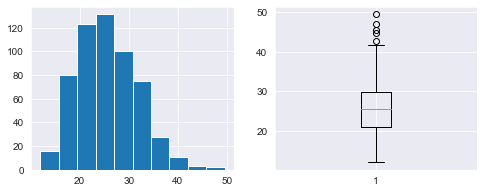

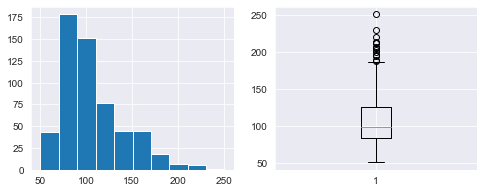

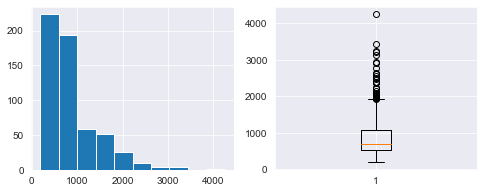

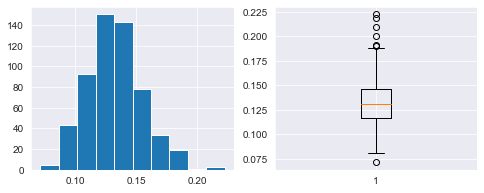

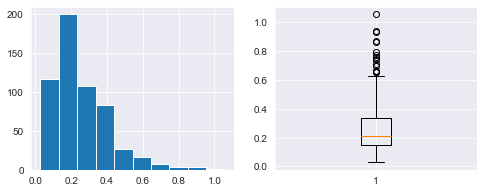

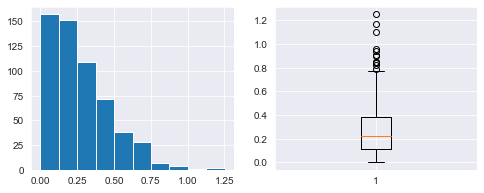

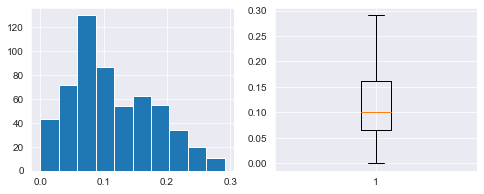

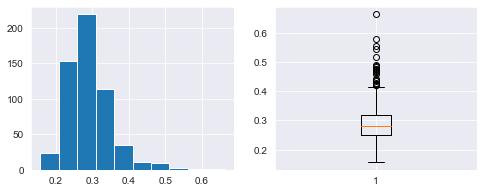

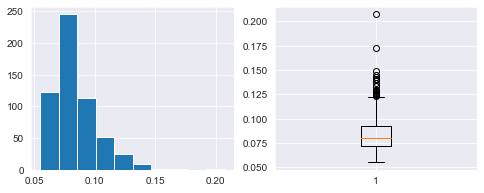

In [138]:
for feature in features:
    plt.figure(figsize = (8,3))
    plt.subplot(1,2,1)
    plt.hist(data[feature])
    plt.subplot(1,2,2)
    plt.boxplot(data[feature])
    plt.show()

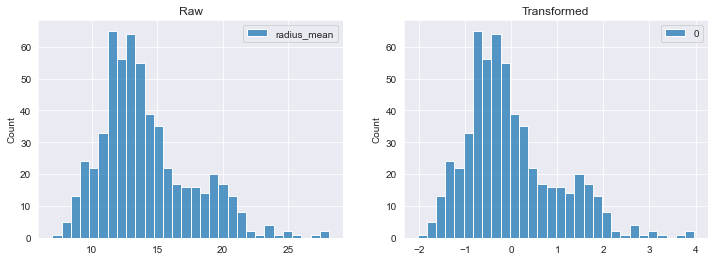

In [139]:
scaler = StandardScaler()

for feature in features:
    X = features[[feature]]
    X_transf = scaler.fit_transform (X)
    
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    sns.histplot(X, bins=30).set(title='Raw')
    plt.subplot(1,2,2)
    sns.histplot(X_transf, bins=30).set(title='Transformed')
    plt.show()
    break

### Se usa el comando `'inverse_transform'` para `recuperar` los datos originales y devolverlos a 'negocio'

In [140]:
X = features[['area_mean']]
print(X[0:5])

print('-------------------------------')

scaler = StandardScaler()
scaler = scaler.fit(X) 
Xrescaled = scaler.transform(X)
print(Xrescaled[0:5])

print('-------------------------------')

Xraw = scaler.inverse_transform(Xrescaled)
print(Xraw[0:5])

   area_mean
0     1001.0
1     1326.0
2     1203.0
3      386.1
4     1297.0
-------------------------------
[[ 0.9843749 ]
 [ 1.90870825]
 [ 1.55888363]
 [-0.76446379]
 [ 1.82622928]]
-------------------------------
[[1001. ]
 [1326. ]
 [1203. ]
 [ 386.1]
 [1297. ]]


### 4.3. Normalización (Normalizer)
- Funciona bien cuando no hay datos gaussianos
- Tiene sentido usarla con más de una feature
- Reescala a nivel de fila, y no a nivel de columna como los 2 escalados anteriores

In [142]:
#scaler = Normalizer.fit()
#NormalizedX = scaler.transform(X)

### 4.4. Binarize 
- Crea variables DUMMY con valores (0-1).
- A partir de un umbral en el dato se le asigna el valor 1, de lo contrario, el 0
- Casos de uso: Datos nulos Vs. No Nulos, Datos desbalanceados (con muchos ceros)
- Generación de variables dummy, usando de umbral la media o la mediana

In [143]:
umbral = np.median(X)
umbral

551.1

In [144]:
X = features[['area_mean']]
umbral = np.median(X)
binaryX = Binarizer(threshold=umbral).fit(X).transform(X)
binaryX

array([[1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],

In [145]:
X

,area_mean
0,1001.0
1,1326.0
2,1203.0
3,386.1
4,1297.0
...,...
564,1479.0
565,1261.0
566,858.1
567,1265.0


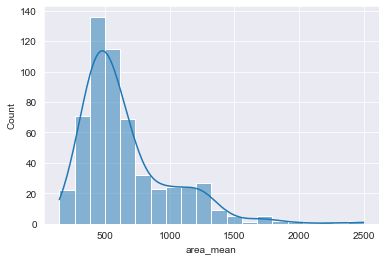

In [146]:
sns.histplot(x='area_mean', data=data, bins=20, kde=True)
plt.show()

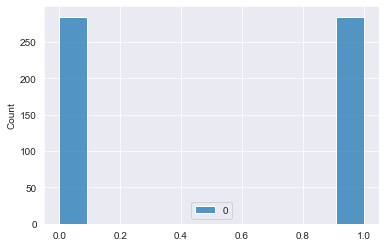

In [147]:
sns.histplot(binaryX)
plt.show()

13.37


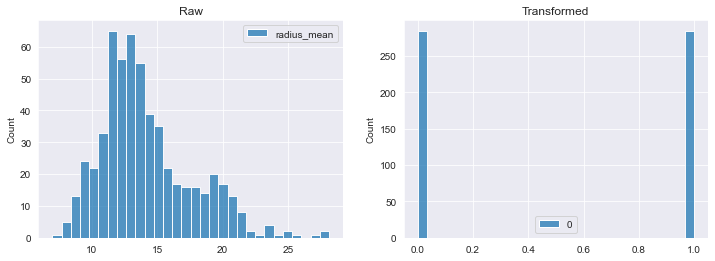

18.84


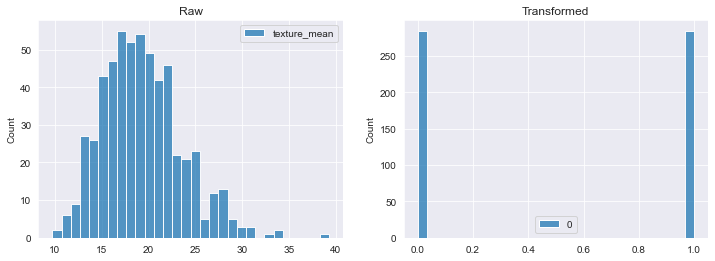

86.24


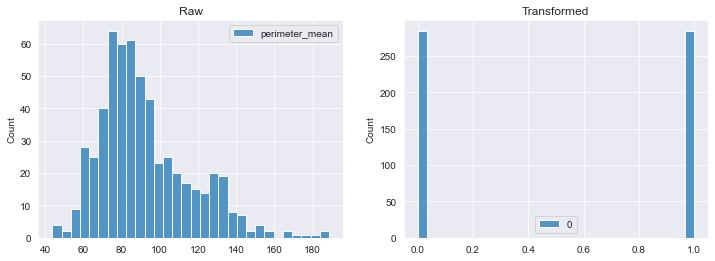

551.1


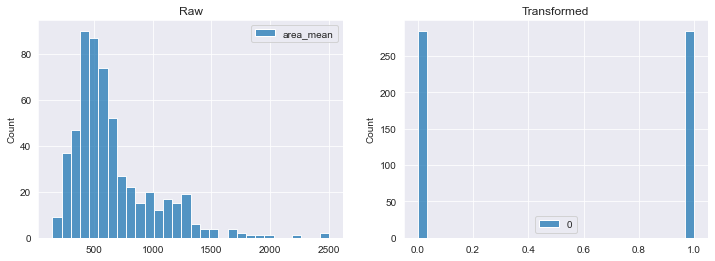

0.09587000000000001


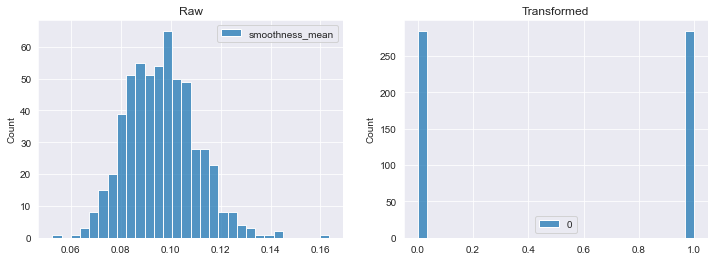

0.09262999999999999


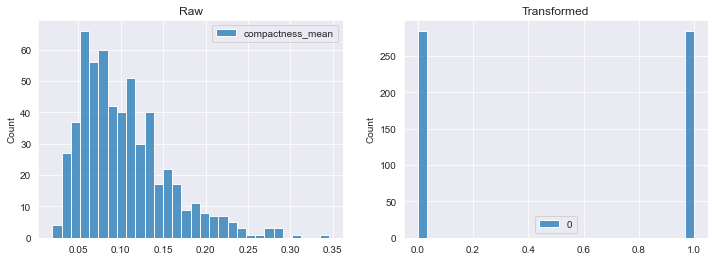

0.06154


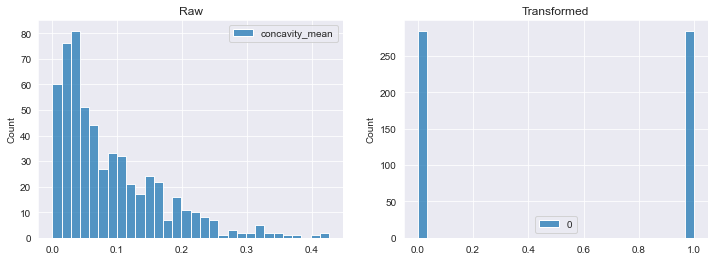

0.0335


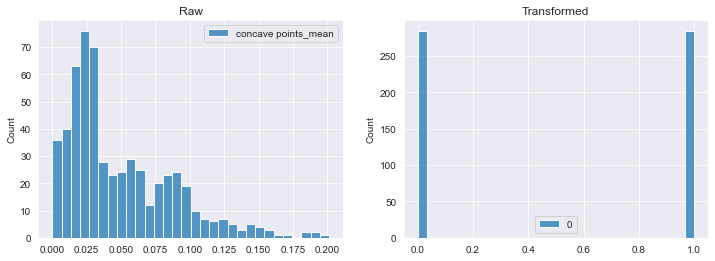

0.1792


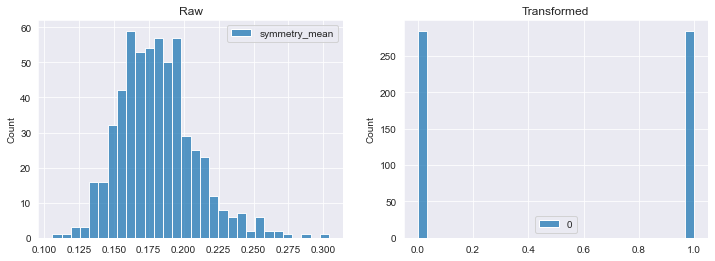

0.06154


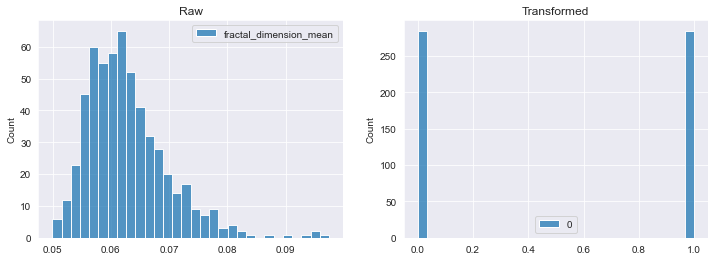

0.3242


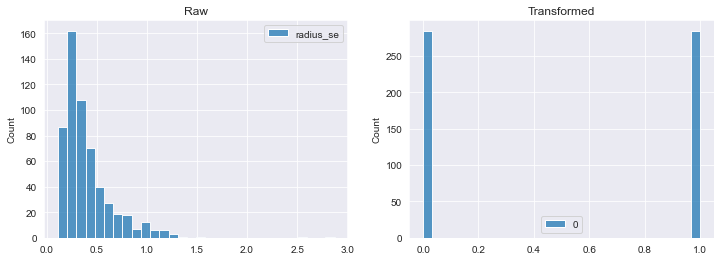

1.1079999999999999


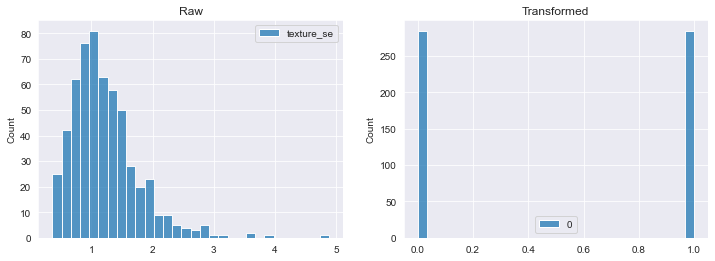

2.287


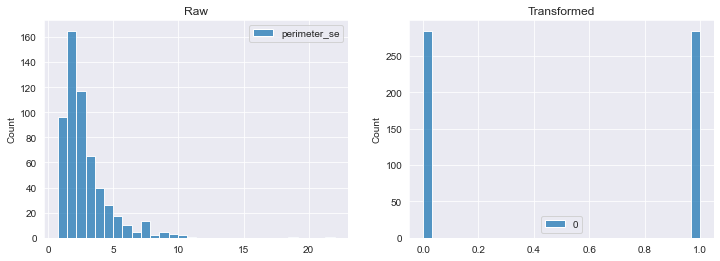

24.53


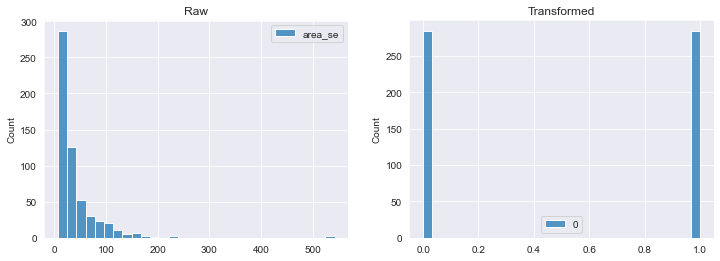

0.006379999999999999


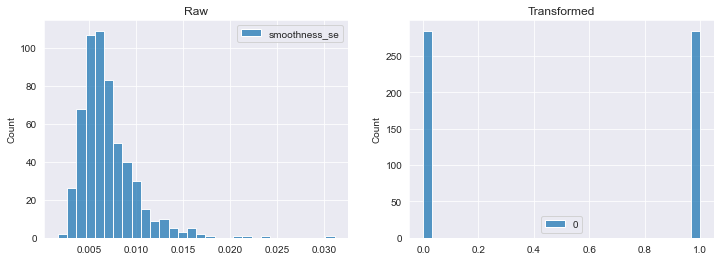

0.02045


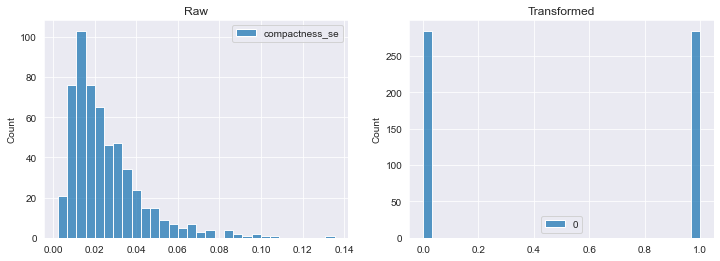

0.025889999999999996


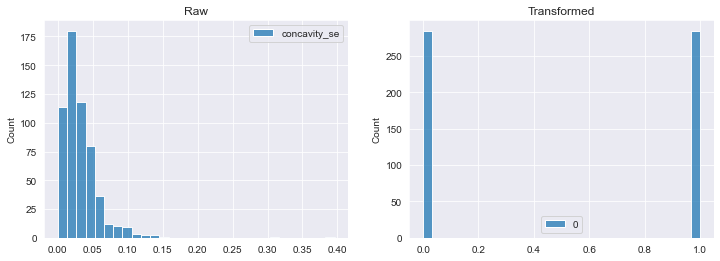

0.01093


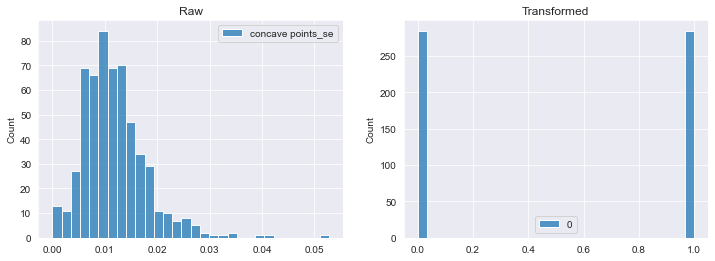

0.01873


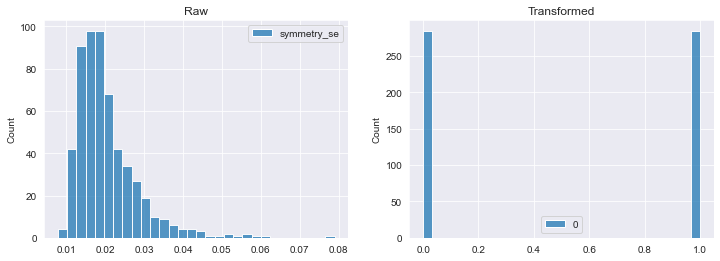

0.003187


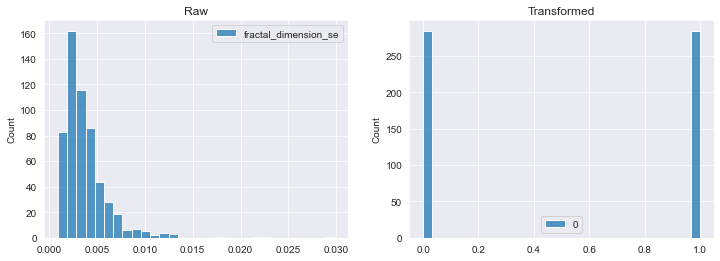

14.97


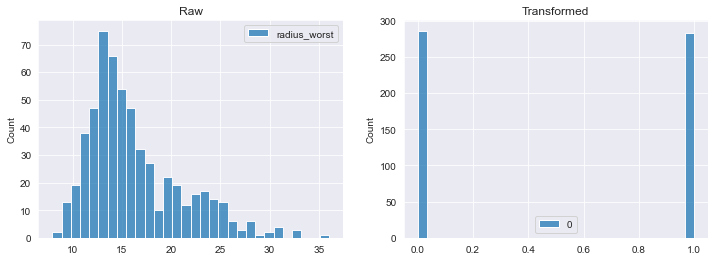

25.41


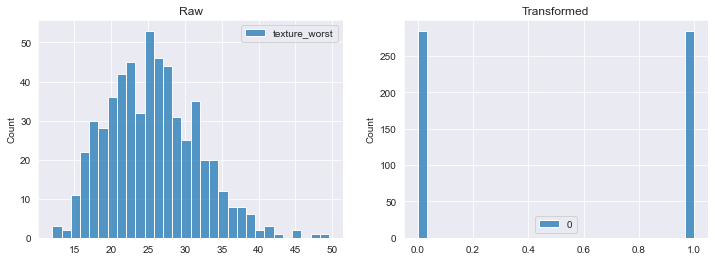

97.66


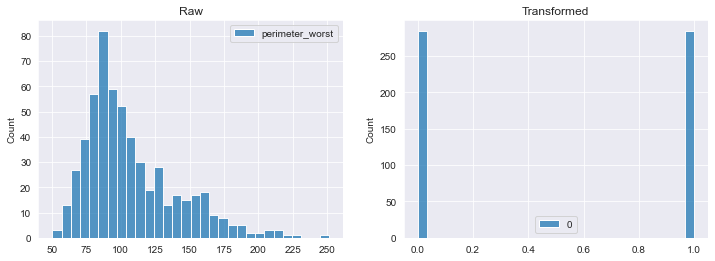

686.5


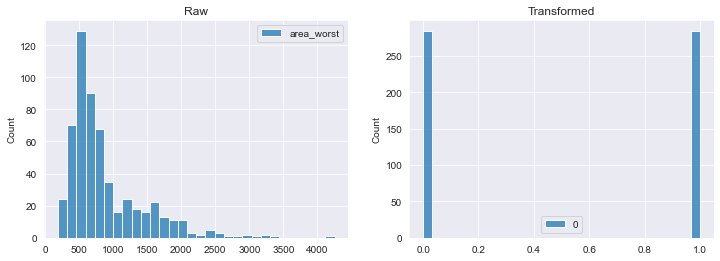

0.1313


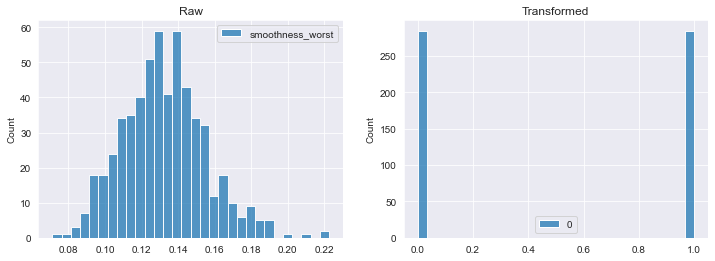

0.2119


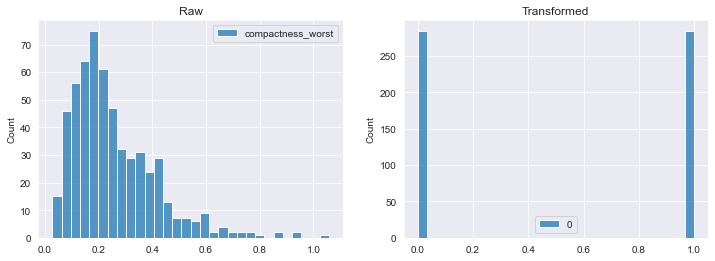

0.2267


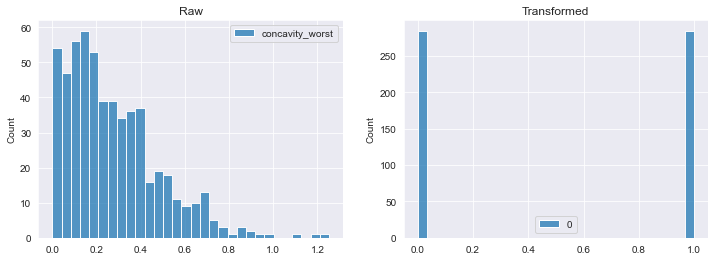

0.09992999999999999


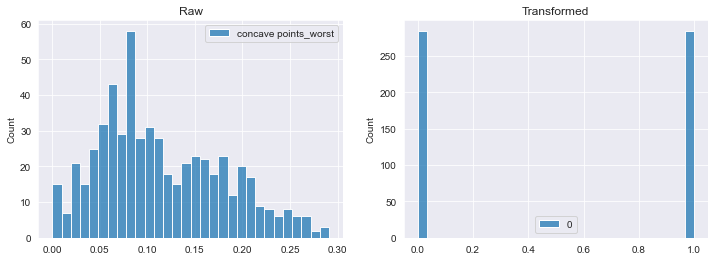

0.2822


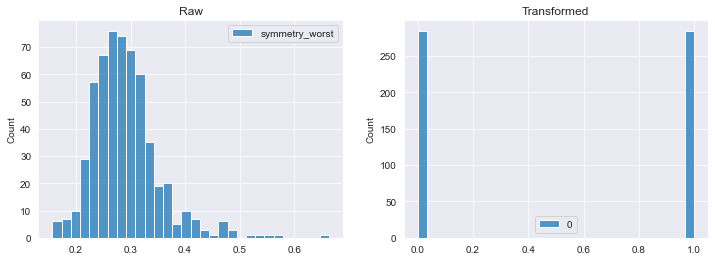

0.08004


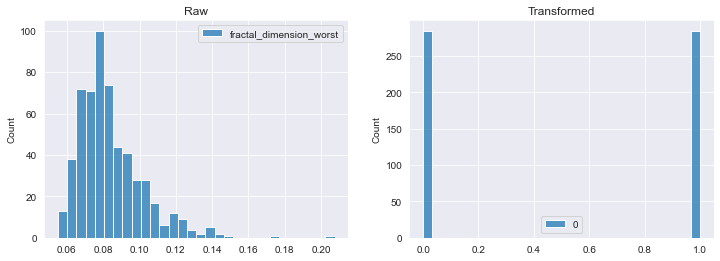

In [153]:
for feature in features:
    X = features[[feature]]
    umbral = np.median(X)
    print (umbral)
    scaler = Binarizer(threshold=umbral)
    X_transf = scaler.fit_transform (X)
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    sns.histplot(X, bins=30).set(title='Raw')
    plt.subplot(1,2,2)
    sns.histplot(X_transf, bins=30).set(title='Transformed')
    plt.show()

### Ejercicio Binarizer
1. Aplicación de regresión logística a un modelo binarizado y a otro sin binarizar
2. Binarizado por la mediana de todos los features
3. Comparar score de modelo binarizado y sin binarizar

In [149]:
# Se especifican los features y el target
# Para el caso no se hace train_test split
X,y = features, target

# Se define el primer modelo sin binarizar (model1)
model1 = LogisticRegression()
model1.fit(X,y)    # entrenamiento
scores1 = model1.score(X,y)    # score
print(scores1)

medians = np.median(X, axis=0)   # Threshold, 'axis=0' especifica la mediana por fila
scaler = Binarizer(threshold = medians)   # se define método de Scaler usando como threshold la 'mediana'
X_scaled = scaler.fit_transform(X)    # se escalan las features

# Se define el segundo modelo para los datos binarizados (model2)
model2 = LogisticRegression()
model2.fit(X_scaled,y)    # Se entrena indicando que se aplica a las features previamente binarizadas
scores2 = model2.score(X_scaled, y)   # score
print(scores2)

0.9490333919156415


InvalidParameterError: The 'threshold' parameter of Binarizer must be an instance of 'float'. Got array([1.337e+01, 1.884e+01, 8.624e+01, 5.511e+02, 9.587e-02, 9.263e-02,
       6.154e-02, 3.350e-02, 1.792e-01, 6.154e-02, 3.242e-01, 1.108e+00,
       2.287e+00, 2.453e+01, 6.380e-03, 2.045e-02, 2.589e-02, 1.093e-02,
       1.873e-02, 3.187e-03, 1.497e+01, 2.541e+01, 9.766e+01, 6.865e+02,
       1.313e-01, 2.119e-01, 2.267e-01, 9.993e-02, 2.822e-01, 8.004e-02]) instead.

In [77]:
X = features
umbral = np.median(X, axis=0)
umbral

array([1.337e+01, 1.884e+01, 8.624e+01, 5.511e+02, 9.587e-02, 9.263e-02,
       6.154e-02, 3.350e-02, 1.792e-01, 6.154e-02, 3.242e-01, 1.108e+00,
       2.287e+00, 2.453e+01, 6.380e-03, 2.045e-02, 2.589e-02, 1.093e-02,
       1.873e-02, 3.187e-03, 1.497e+01, 2.541e+01, 9.766e+01, 6.865e+02,
       1.313e-01, 2.119e-01, 2.267e-01, 9.993e-02, 2.822e-01, 8.004e-02])

### Ejercicio: Binarizer de conjunto train/test split

In [157]:
# train_test split (80% para train y 20% para test)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = 99)

In [158]:
# modelo1: LogisticRegression sólo con train_test split
# Se define el primer modelo sin binarizar (model1)
model1 = LogisticRegression()
model1.fit(X_train,y_train)    # entrenamiento
scores1 = model1.score(X_test,y_test)    # score
print(scores1)

# modelo2: LogisticRegression con train_test split y luego binarizado
medians = np.median(X_train, axis=0)   # Threshold, 'axis=0' especifica la mediana por fila
scaler = Binarizer(threshold = medians)   # se define método de Scaler usando como threshold la 'mediana'
X_scaled = scaler.fit_transform(X_train)    # se escalan las features

# Se define el segundo modelo para los datos binarizados (model2)
model2 = LogisticRegression()
model2.fit(X_scaled,y_train)    # Se entrena indicando que se aplica a las features previamente binarizadas

# !!! se binariza el conjunto test y luego se transforma usando los datos previamente entrenados con model2
# !!! tener muy encuenta que NO se entrena el conjunto test
X_test_scaled = scaler.transform(X_test) 

# !! se saca el score del conjunto test previamente binarizado 
scores2 = model2.score(X_test_scaled, y_test)   # score
print(scores2)

0.9473684210526315


InvalidParameterError: The 'threshold' parameter of Binarizer must be an instance of 'float'. Got array([1.348e+01, 1.877e+01, 8.732e+01, 5.592e+02, 9.610e-02, 9.462e-02,
       6.593e-02, 3.562e-02, 1.799e-01, 6.154e-02, 3.276e-01, 1.067e+00,
       2.329e+00, 2.472e+01, 6.380e-03, 2.047e-02, 2.615e-02, 1.110e-02,
       1.897e-02, 3.187e-03, 1.505e+01, 2.521e+01, 9.800e+01, 6.987e+02,
       1.314e-01, 2.141e-01, 2.310e-01, 1.015e-01, 2.826e-01, 8.009e-02]) instead.